<a href="https://colab.research.google.com/github/aquibaijaz11/GRIP-TSF/blob/master/GRIP_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GRIP :  Task 3


---



---



---





#Importing the Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Importing and processing the dataset

In [ ]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [ ]:
X = iris.iloc[:, [0, 1, 2, 3]].values

#Visualising the dataset

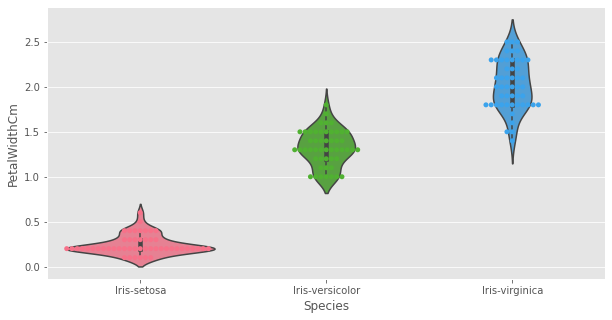

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x="Species", y="PetalWidthCm", palette="husl", data=iris)
sns.swarmplot(x="Species", y="PetalWidthCm", palette="husl", data=iris)
plt.show()

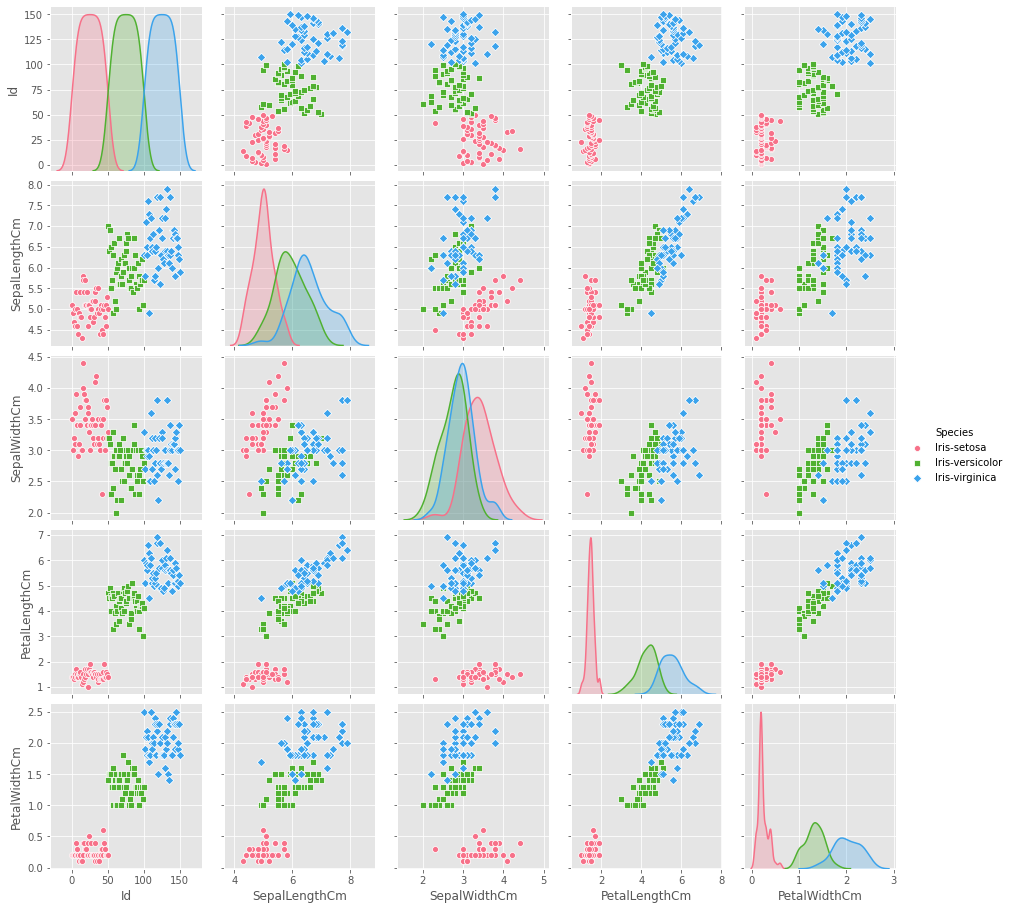

In [ ]:
sns.pairplot(iris, hue='Species', markers=["o", "s", "D"], palette="husl")

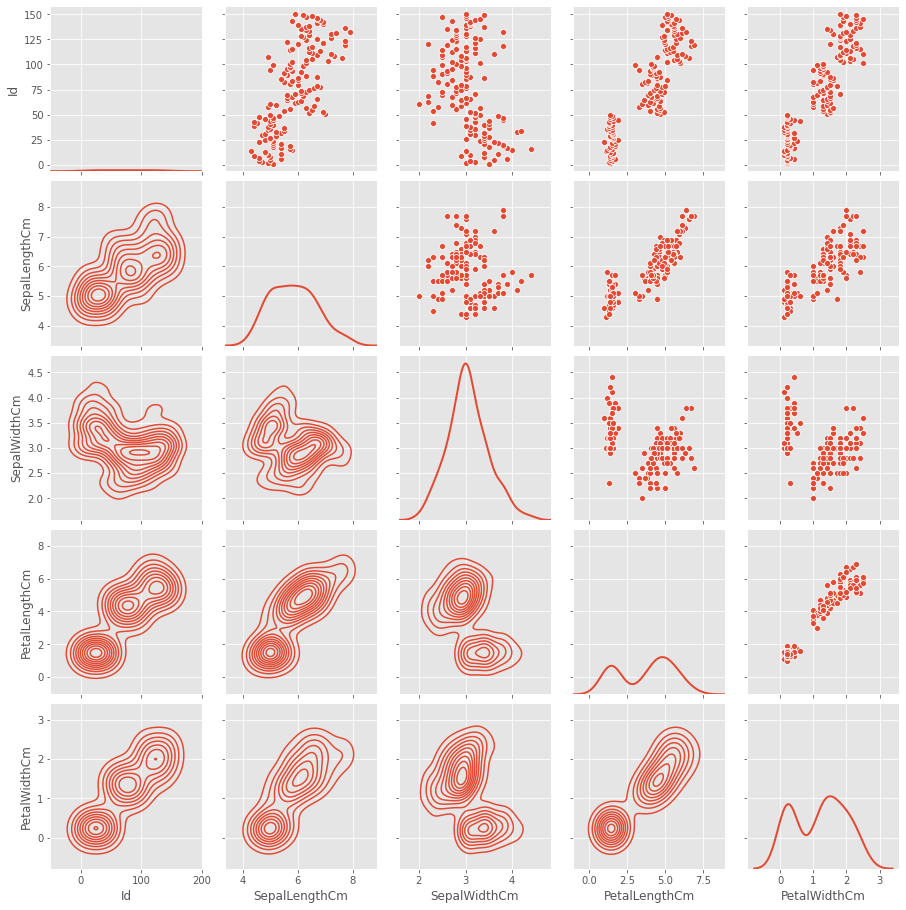

In [ ]:
g = sns.PairGrid(iris)
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.kdeplot, colors="C0")
g = g.map_diag(sns.kdeplot, lw=2)

#K-Means Clustering 

#Using Elbow method to find the optimal number of clusters

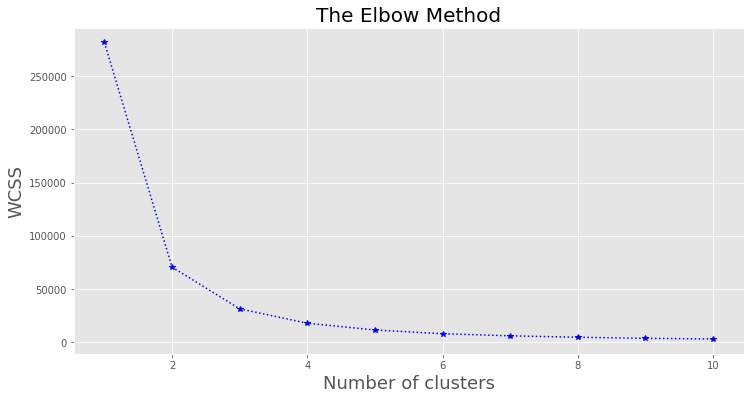

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 60, n_init =10, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))   
plt.style.use('ggplot')  
plt.plot(range(1, 11), wcss, '*k:', color = 'blue')
plt.title('The Elbow Method',fontdict={'fontsize':20})
plt.xlabel('Number of clusters',fontdict={'fontsize':18})
plt.ylabel('WCSS',fontdict={'fontsize':18})
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


#Visualising the result of K-Means Clustering

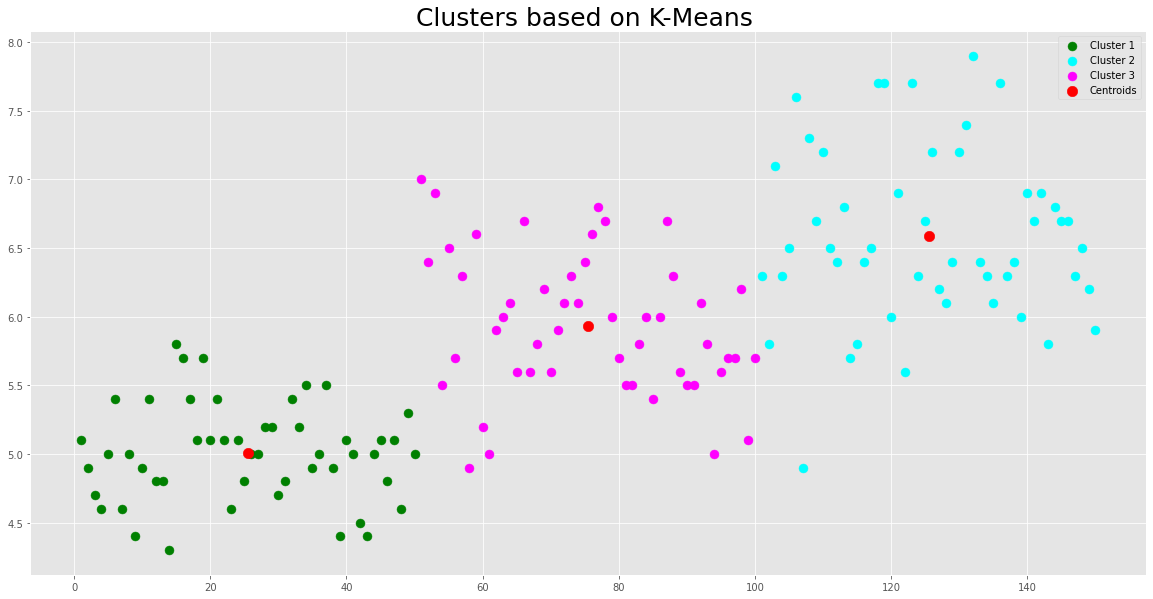

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 80, c = 'green', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 80, c = 'cyan', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 80, c = 'magenta', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 110, c = 'red', label = 'Centroids')
plt.title('Clusters based on K-Means ',fontdict={'fontsize':25})
plt.legend()
plt.show()

#Agglomerative Clustering

#Plotting the Dendogram

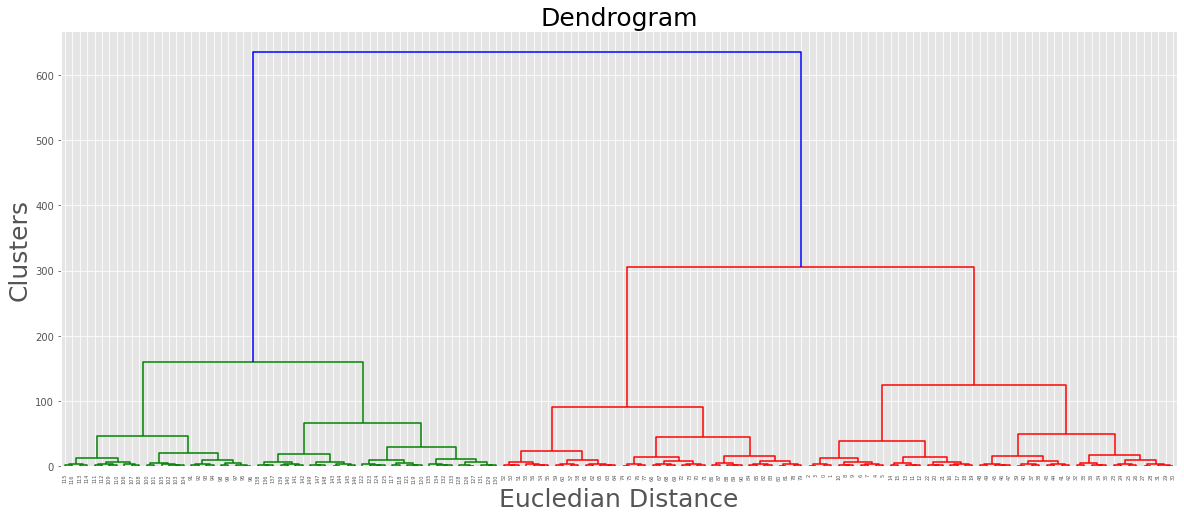

In [ ]:
plt.figure(figsize=(20,8))
from scipy.cluster import hierarchy as sch
dendro = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram',fontdict={'fontsize':25})
plt.xlabel('Eucledian Distance',fontdict={'fontsize':25})
plt.ylabel('Clusters',fontdict={'fontsize':25})
plt.show()

#Training the model and prediciting the result

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean' , linkage = 'ward')
y_pred = cluster.fit_predict(X)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


#Visualising the result of Agglomerative Clustering

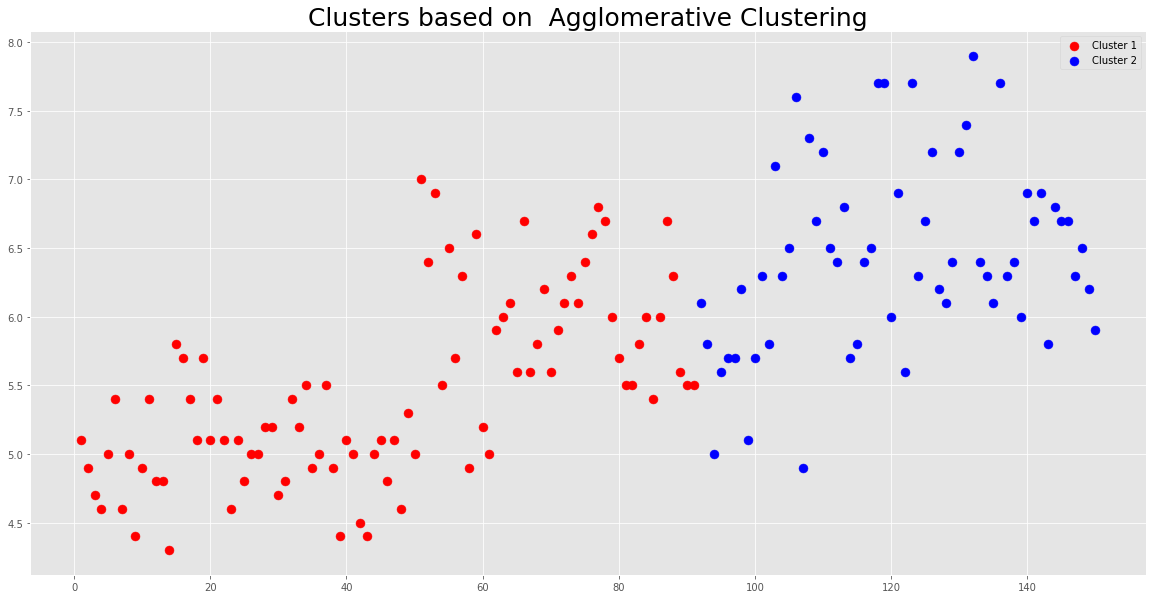

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X[y_pred == 0,0], X[y_pred == 0,1], s=80, c= 'red', label = 'Cluster 1')
plt.scatter(X[y_pred == 1,0], X[y_pred == 1,1], s=80, c= 'blue', label = 'Cluster 2')
plt.title('Clusters based on  Agglomerative Clustering',fontdict={'fontsize':25})
plt.legend()
plt.show()

#***END***